<a href="https://colab.research.google.com/github/Leito2022/Hackaton/blob/Leo/Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
#Suba del archivo

from google.colab import files
import io

file = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
df_water = pd.read_csv(io.BytesIO(file["water_potability.csv"]))

df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#Observamos la proporcion de los datos del target
df_water["Potability"].value_counts(True)
#df_water["Potability"].value_counts()

0    0.60989
1    0.39011
Name: Potability, dtype: float64

In [ ]:
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#Contamos los na que existen en nuestro DF

df_water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
print('% de registros con al menos un valor nulo:     ', np.round(100 * df_water.isna().any(axis=1).sum() / df_water.shape[0], 1))

% de registros con al menos un valor nulo:      38.6


In [ ]:
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


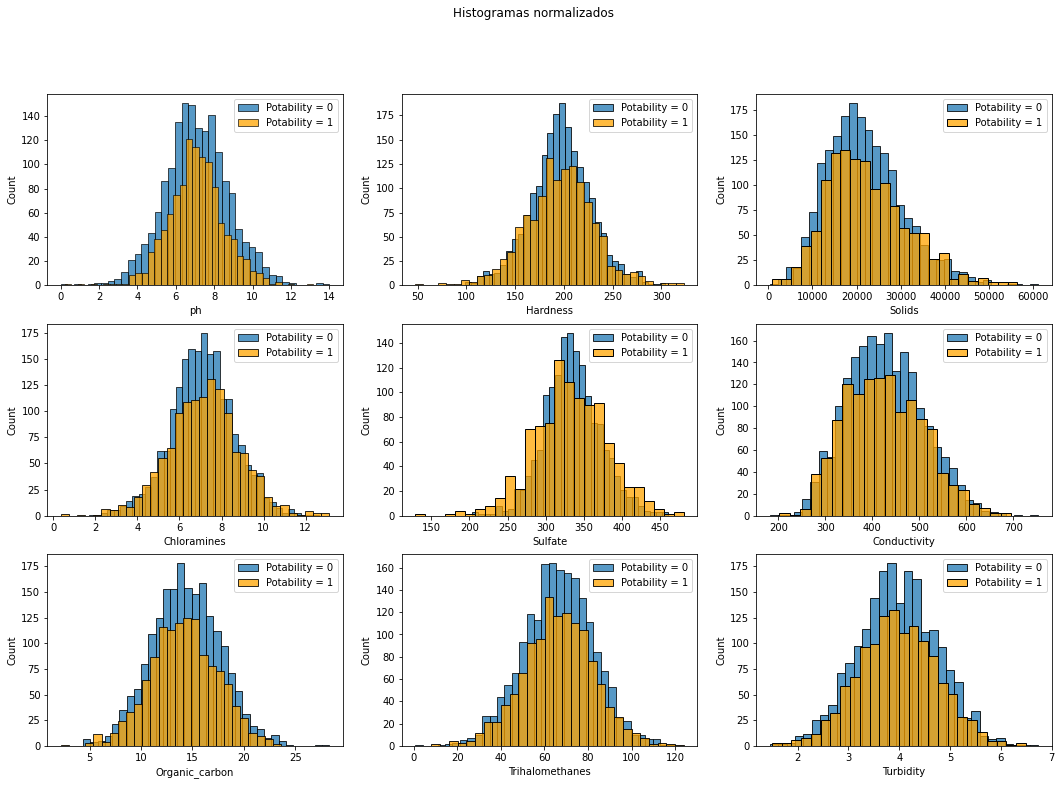

In [ ]:
# Creamos un grafico para cada feature discriminando por el valor del target con un loop
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df_water.columns[:-1], axes.flatten()):
    sns.histplot(data = df_water.loc[df_water['Potability']==0, c].dropna(), stat = 'count', ax = ax, kde = False )
    sns.histplot(data = df_water.loc[df_water['Potability']==1, c].dropna(), stat = 'count', kde=False, ax=ax, color = 'orange')
    ax.legend(['Potability = 0', 'Potability = 1'])
# Importante: el grafico utiliza el metodo "density" que permite comparar las clases desbalanceadas (ver que ocurre con otro metodos)

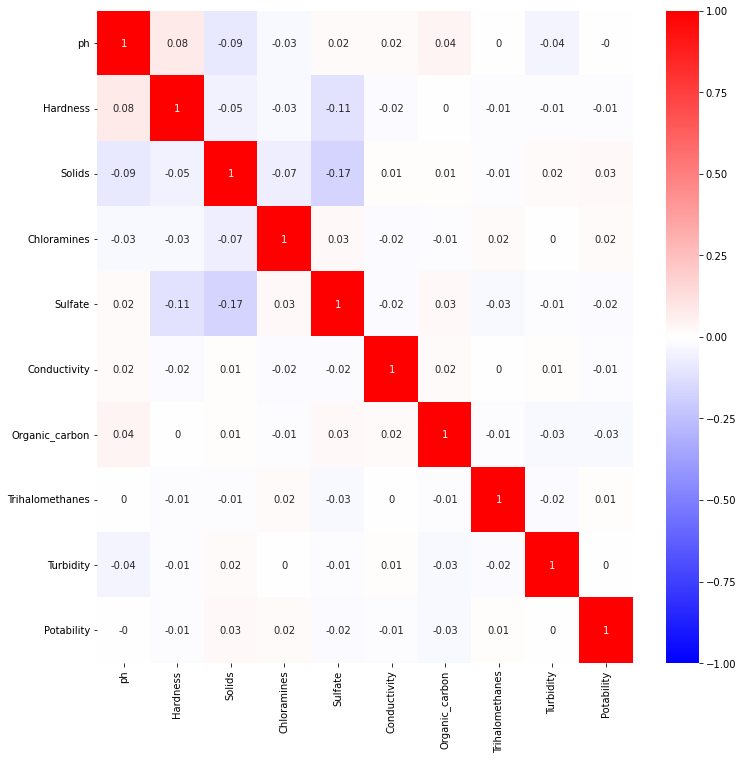

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_water.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='bwr')

In [ ]:
#Es dificil decidir acerca de los NA que presenta el data set. Como vimos representan un gran % del mismo.
#Eliminarlos no parece lógico debido a la gran cantidad que tenemos.
#Sacar el promedio puede desvirtuar la muestra, pues su categorización depende del valor que pueda adoptar los NA.
#Por lo que, de una forma rebuscada, sacaremos los promedios de la columna ph tanto para el caso en que el target sea 0 o 1
#luego se reemplazará los NA con los promedios según el parametro potability sea 0 o 1.
import matplotlib.pyplot as plt

ph_1 = df_water[df_water.Potability == 0]
print("Promedio de Ph cuando el agua NO es potable: ", ph_1.ph.mean())

ph_2 = df_water[df_water.Potability != 0]
print("Promedio de Ph cuando el agua SI es potable: ", ph_2.ph.mean())



Promedio de Ph cuando el agua NO es potable:  7.085378435983544
Promedio de Ph cuando el agua SI es potable:  7.0737832953812


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


(array([  2.,   3.,  19., 103., 292., 423., 186.,  63.,   8.,   2.]),
 array([ 0.22749905,  1.52228932,  2.81707959,  4.11186985,  5.40666012,
         6.70145039,  7.99624065,  9.29103092, 10.58582119, 11.88061146,
        13.17540172]),
 <a list of 10 Patch objects>)

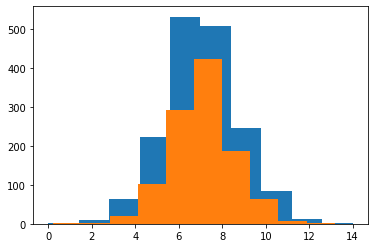

In [ ]:
plt.hist(x = ph_1["ph"])
plt.hist(x = ph_2["ph"])

In [ ]:
#Observamos que tanto en las muestras con potabilidad 1 como con potabilidad 0 el promedio del ph es casi igual
#por lo que reemplazaremos los NaN de ph por el promedio general de la columna.

df_water["ph"].fillna(value = df_water.ph.mean(), inplace = True)

Promedio de Sulfato cuando el agua NO es potable:  334.5642895786881
Promedio de Sulfato cuando el agua SI es potable:  332.5669902336656


(array([  1.,   5.,  17.,  61., 187., 291., 245., 125.,  46.,   7.]),
 array([129.        , 164.20306423, 199.40612846, 234.60919269,
        269.81225692, 305.01532115, 340.21838538, 375.42144961,
        410.62451384, 445.82757808, 481.03064231]),
 <a list of 10 Patch objects>)

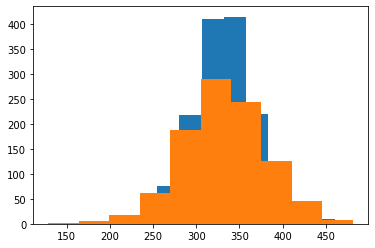

In [ ]:
#Procedemos a repetir los pasos con las demas variables que poseen NaN (sulfate)

ph_1 = df_water[df_water.Potability == 0]
print("Promedio de Sulfato cuando el agua NO es potable: ", ph_1.Sulfate.mean())

ph_2 = df_water[df_water.Potability != 0]
print("Promedio de Sulfato cuando el agua SI es potable: ", ph_2.Sulfate.mean())

plt.hist(x = ph_1["Sulfate"])
plt.hist(x = ph_2["Sulfate"])

In [ ]:
df_water["Sulfate"].fillna(value = df_water["Sulfate"].mean(), inplace = True)

Promedio de Sulfato cuando el agua NO es potable:  66.30355527306088
Promedio de Sulfato cuando el agua SI es potable:  66.53968374070116


(array([  6.,  16.,  68., 179., 326., 332., 202.,  70.,  18.,   6.]),
 array([  8.17587638,  19.75828875,  31.34070111,  42.92311347,
         54.50552583,  66.08793819,  77.67035055,  89.25276292,
        100.83517528, 112.41758764, 124.        ]),
 <a list of 10 Patch objects>)

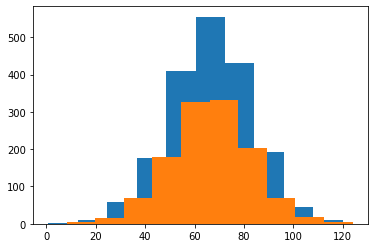

In [ ]:
#Proseguimos con la última variable Trihalomethanes

ph_1 = df_water[df_water.Potability == 0]
print("Promedio de Sulfato cuando el agua NO es potable: ", ph_1.Trihalomethanes.mean())

ph_2 = df_water[df_water.Potability != 0]
print("Promedio de Sulfato cuando el agua SI es potable: ", ph_2.Trihalomethanes.mean())

plt.hist(x = ph_1["Trihalomethanes"])
plt.hist(x = ph_2["Trihalomethanes"])


In [ ]:
df_water["Trihalomethanes"].fillna(value = df_water["Trihalomethanes"].mean(), inplace = True)

In [ ]:
#Ya no tenemos valores Na

df_water.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Del mapa de color realizado determinamos que la relación entre variables es pobre,
#podemos declarar que son independientes unas de otras y que no hay correlación entre sí.
#Nos da lugar a implementar el método de Naive Bayes, pero realizaremos de todas formas una regresión logística.

#Preparamos los datos en x e y, siendo y la variable target Potability y x el resto.

x = df_water.drop(columns = "Potability")

y = df_water["Potability"]

#Separamos los datos de entrenamiento y testeo.

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 0)


In [ ]:
#Escalamos los datos

scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
X_test_std = scaler.transform(x_test)



#  **MODELO DE REGRESIÓN LOGÍSTICA**

In [ ]:
#Instanciamos el modelo

lr = LogisticRegression( penalty= "l2",
                        class_weight= None)

lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)

Accuracy del modelo de Reg. Logistica :    0.611
Recall del modelo de Reg. Logistica :    0.001
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.61      1.00      0.76      1499
           1       1.00      0.00      0.00       958

    accuracy                           0.61      2457
   macro avg       0.81      0.50      0.38      2457
weighted avg       0.76      0.61      0.46      2457



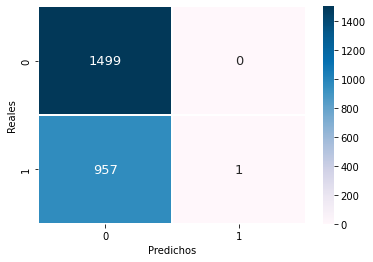

In [ ]:
# Imprimimos resumen de metricas y la matriz de confusion

model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_train_pred).round(3))
print('Recall del modelo de ' + model_name + ' :   ', recall_score(y_train, y_train_pred).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred))

In [ ]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = lr.predict_proba(X_train_std[y_train==0])[:,1], stat = 'count', ax=ax01)
sns.histplot(data = lr.predict_proba(X_train_std[y_train==1])[:,1], stat = 'count', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Potabilidad = 0', 'Potabilidad = 1'])

In [ ]:
#Modelo Naive Bayes

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_train_pred_gnb = gnb.predict(x_train)

Accuracy del modelo de Naibe Bayes:     0.637
Recall del modelo de Naibe Bayes:       0.245
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.65      0.89      0.75      1499
           1       0.58      0.25      0.35       958

    accuracy                           0.64      2457
   macro avg       0.61      0.57      0.55      2457
weighted avg       0.62      0.64      0.59      2457



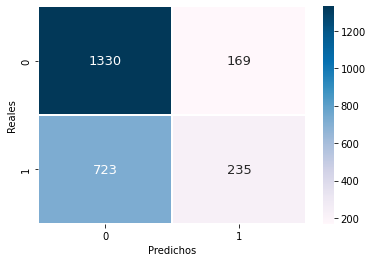

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_gnb), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
          annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de Naibe Bayes:    ', accuracy_score(y_train, y_train_pred_gnb).round(3))
print('Recall del modelo de Naibe Bayes:      ', recall_score(y_train, y_train_pred_gnb).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred_gnb))